In [1]:
# installling the kaggle library
!pip install kaggle

In [3]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
# kaggle API
!kaggle competitions download -c dogs-vs-cats

 98% 795M/812M [00:04<00:00, 210MB/s]
100% 812M/812M [00:04<00:00, 186MB/s]


In [5]:
!ls

dogs-vs-cats.zip  kaggle.json  sample_data


In [6]:
# extract the compressed dataset
from zipfile import ZipFile

datset = '//content/dogs-vs-cats.zip'
from zipfile import ZipFile

with ZipFile(datset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
# extract the compressed dataset
from zipfile import ZipFile

datset = '/content/train.zip'
from zipfile import ZipFile

with ZipFile(datset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [8]:
import os
# counting the number of files in train folder
path, dirs, files = next (os.walk('/content/train'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  25000


In [9]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.8642.jpg', 'cat.7025.jpg', 'dog.5211.jpg', 'cat.8410.jpg', 'dog.8607.jpg', 'dog.5822.jpg', 'dog.11505.jpg', 'dog.4169.jpg', 'cat.5893.jpg', 'cat.9531.jpg', 'cat.61.jpg', 'dog.10002.jpg', 'dog.1993.jpg', 'dog.10058.jpg', 'cat.5398.jpg', 'dog.1724.jpg', 'dog.10201.jpg', 'dog.5414.jpg', 'dog.7752.jpg', 'dog.10683.jpg', 'dog.2943.jpg', 'dog.5527.jpg', 'dog.3694.jpg', 'dog.6131.jpg', 'dog.5375.jpg', 'dog.11960.jpg', 'dog.8535.jpg', 'dog.11206.jpg', 'dog.7544.jpg', 'cat.2355.jpg', 'dog.10532.jpg', 'dog.6995.jpg', 'cat.1877.jpg', 'cat.115.jpg', 'cat.2092.jpg', 'dog.8465.jpg', 'cat.7422.jpg', 'cat.9672.jpg', 'dog.3548.jpg', 'dog.4480.jpg', 'dog.2816.jpg', 'dog.5604.jpg', 'cat.1086.jpg', 'cat.3643.jpg', 'cat.12421.jpg', 'dog.4989.jpg', 'cat.11980.jpg', 'dog.2455.jpg', 'cat.8733.jpg', 'dog.4703.jpg', 'dog.473.jpg', 'cat.676.jpg', 'cat.6317.jpg', 'cat.11025.jpg', 'cat.8532.jpg', 'cat.4221.jpg', 'dog.6044.jpg', 'cat.6882.jpg', 'dog.4813.jpg', 'dog.7818.jpg', 'dog.6294.jpg', 'dog.8738.jpg', '

In [10]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mping
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow


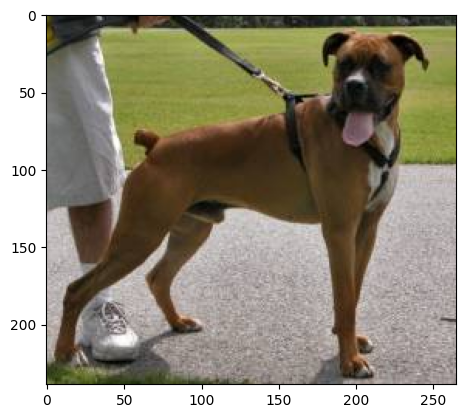

In [12]:
# display dog image
img = mping.imread('/content/train/dog.5822.jpg')
imgplt = plt.imshow(img)

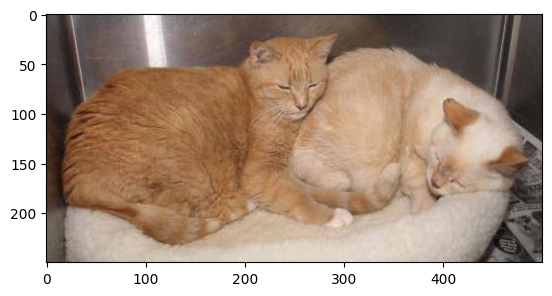

In [13]:
# display cat image
img = mping.imread('/content/train/cat.7025.jpg')
imgplt = plt.imshow(img)

In [14]:
file_names = os.listdir('/content/train')

for i in range(5):
  name = file_names[i]
  print(name[0:3])

cat
cat
dog
cat
dog


In [15]:
file_names = os.listdir('/content/train')


dog_count = 0
cat_count = 0


for img_file in file_names:


  name = img_file[0:3]

  if name == 'dog':
    dog_count +=1

  else:
    cat_count += 1

print('Number of dog images =', dog_count)
print('Number of cat images =', cat_count)

Number of dog images = 12500
Number of cat images = 12500


In [16]:
# creating a directory for resized images
os.mkdir('/content/image resized')

In [17]:
original_folder = '/content/train/'
resized_folder = '/content/image resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

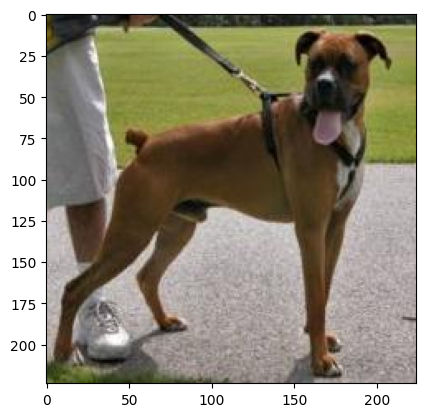

In [19]:
# display resized dog image
img = mping.imread('/content/image resized/dog.5822.jpg')
imgplt = plt.imshow(img)
plt.show()

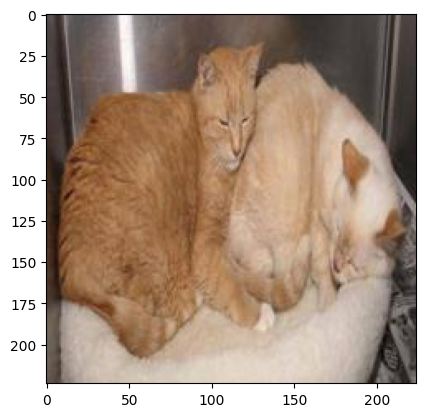

In [20]:
# display resized cat image
img = mping.imread('/content/image resized/cat.7025.jpg')
imgplt = plt.imshow(img)
plt.show()

In [21]:
# creating a for loop to assign labels
file_names = os.listdir('/content/image resized')
labels = []

for i in range(2000):

  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)

  else:
      labels.append(0)

In [22]:
print(file_names[0:5])
print(len(file_names))

['cat.8642.jpg', 'cat.7025.jpg', 'dog.5211.jpg', 'cat.8410.jpg', 'dog.8607.jpg']
2000


In [23]:
print(labels[0:5])
print(len(labels))

[0, 0, 1, 0, 1]
2000


In [24]:
# counting the images of dogs and cats out of 2000 images
values, counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[1004  996]


In [25]:
import cv2
import glob

In [26]:
image_directory = '/content/image resized/'
image_extension = ['png','jpg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [27]:
print(dog_cat_images)

[[[[122 148 162]
   [122 148 162]
   [122 148 162]
   ...
   [130 156 168]
   [131 157 169]
   [131 157 169]]

  [[122 148 162]
   [122 148 162]
   [123 149 163]
   ...
   [130 156 168]
   [131 157 169]
   [131 157 169]]

  [[122 148 162]
   [123 149 163]
   [123 149 163]
   ...
   [131 157 169]
   [131 157 169]
   [131 157 169]]

  ...

  [[ 50  72  78]
   [ 56  78  84]
   [ 55  79  85]
   ...
   [114 131 144]
   [112 129 142]
   [113 130 143]]

  [[ 46  66  71]
   [ 48  70  75]
   [ 46  71  75]
   ...
   [121 137 153]
   [120 136 152]
   [119 138 153]]

  [[ 40  61  63]
   [ 42  65  67]
   [ 42  65  67]
   ...
   [121 137 153]
   [122 140 157]
   [123 141 158]]]


 [[[ 78  76  82]
   [ 81  79  85]
   [ 84  83  92]
   ...
   [ 70  71  81]
   [ 70  71  81]
   [ 70  71  81]]

  [[ 78  76  82]
   [ 81  79  85]
   [ 84  83  92]
   ...
   [ 69  70  80]
   [ 70  71  81]
   [ 70  71  81]]

  [[ 78  76  82]
   [ 81  79  85]
   [ 83  82  91]
   ...
   [ 69  70  80]
   [ 69  70  80]
   [ 69  70

In [28]:
type(dog_cat_images)

numpy.ndarray

In [29]:
print(dog_cat_images.shape)

(2000, 224, 224, 3)


In [30]:
X = dog_cat_images
Y = np.asarray(labels)

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(2000, 224, 224, 3) (1600, 224, 224, 3) (400, 224, 224, 3)


In [33]:
# scaling the data
X_train_scaled =X_train/255

X_test_scaled = X_test/255

In [34]:
print(X_train_scaled)

[[[[0.72941176 0.78039216 0.84313725]
   [0.72941176 0.78039216 0.84313725]
   [0.72941176 0.78039216 0.84313725]
   ...
   [0.78823529 0.80784314 0.84313725]
   [0.76862745 0.79607843 0.83137255]
   [0.8        0.82745098 0.8627451 ]]

  [[0.71764706 0.76862745 0.83137255]
   [0.71372549 0.76470588 0.82745098]
   [0.71372549 0.76470588 0.82745098]
   ...
   [0.78431373 0.80392157 0.83921569]
   [0.76862745 0.79607843 0.83137255]
   [0.8        0.82745098 0.8627451 ]]

  [[0.70980392 0.76078431 0.82352941]
   [0.70980392 0.76078431 0.82352941]
   [0.70980392 0.76078431 0.82352941]
   ...
   [0.78431373 0.80392157 0.83921569]
   [0.76862745 0.79607843 0.83137255]
   [0.80392157 0.83137255 0.86666667]]

  ...

  [[0.23529412 0.32156863 0.45882353]
   [0.23137255 0.31764706 0.45490196]
   [0.25098039 0.3372549  0.4745098 ]
   ...
   [0.65098039 0.69019608 0.72941176]
   [0.65098039 0.69019608 0.72941176]
   [0.65098039 0.69019608 0.72941176]]

  [[0.23137255 0.31764706 0.45882353]
   [0.2

In [35]:
import tensorflow as tf
import tensorflow_hub as hub

In [36]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [37]:
num_of_classes = 2

model = tf.keras.Sequential([

              pretrained_model,
              tf.keras.layers.Dense(num_of_classes)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [38]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [39]:
model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
50/50 [==============================] - 78s 1s/step - loss: 0.1808 - acc: 0.9294
Epoch 2/5
50/50 [==============================] - 70s 1s/step - loss: 0.0573 - acc: 0.9819
Epoch 3/5
50/50 [==============================] - 65s 1s/step - loss: 0.0418 - acc: 0.9925
Epoch 4/5
50/50 [==============================] - 70s 1s/step - loss: 0.0338 - acc: 0.9950
Epoch 5/5
50/50 [==============================] - 66s 1s/step - loss: 0.0281 - acc: 0.9944


In [40]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

13/13 [==============================] - 22s 2s/step - loss: 0.0583 - acc: 0.9725
Test Loss = 0.05832434818148613
Test Accuracy = 0.9725000262260437


Path of the image to be predicted:/content/cat jpg.jpeg


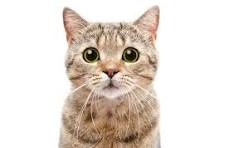

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 224, 224, 3), found shape=(None, 244, 244, 3)


In [42]:
input_image_path = input('Path of the image to be predicted:')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (244,244))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,244,244,3])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
    print('The image represents a Dog')